In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.decomposition import PCA


In [3]:
data = pd.read_csv(r"C:\Users\Akhil R\DeepLearning\AirQualityUCI.csv",sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [11]:
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [13]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [15]:
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [19]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [21]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [23]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [25]:
data.isnull().sum()

CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [29]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517
10,NaN,1011.0,14.0,1.3,527.0,21.0,1818.0,34.0,1197.0,445.0,10.1,60.5,0.7465
33,0.8,889.0,21.0,1.9,574.0,NaN,1680.0,NaN,1187.0,512.0,7.0,62.3,0.6261
34,NaN,831.0,10.0,1.1,506.0,21.0,1893.0,32.0,1134.0,384.0,6.1,65.9,0.6248
39,NaN,1545.0,NaN,22.1,1353.0,NaN,767.0,NaN,2058.0,1588.0,9.2,56.2,0.6561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.dropna(inplace=True)

In [35]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


In [37]:
data.duplicated().sum()

0

In [39]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [41]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
823,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
824,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
825,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


In [71]:
data_cleaned = data[(data >= 0).all(axis=1)]
negative_valuess = data[data < 0]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
823,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
824,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
825,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


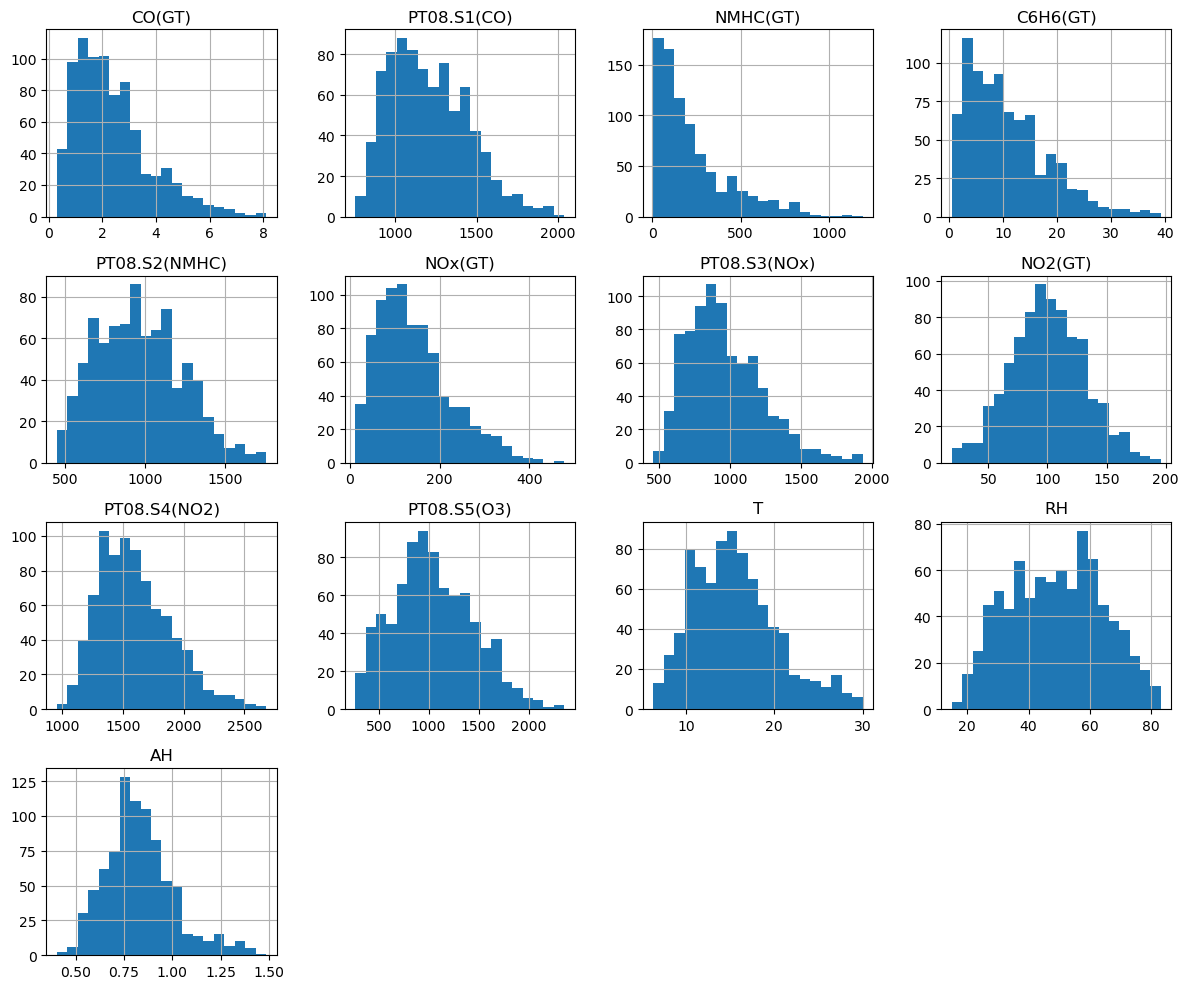

In [181]:
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

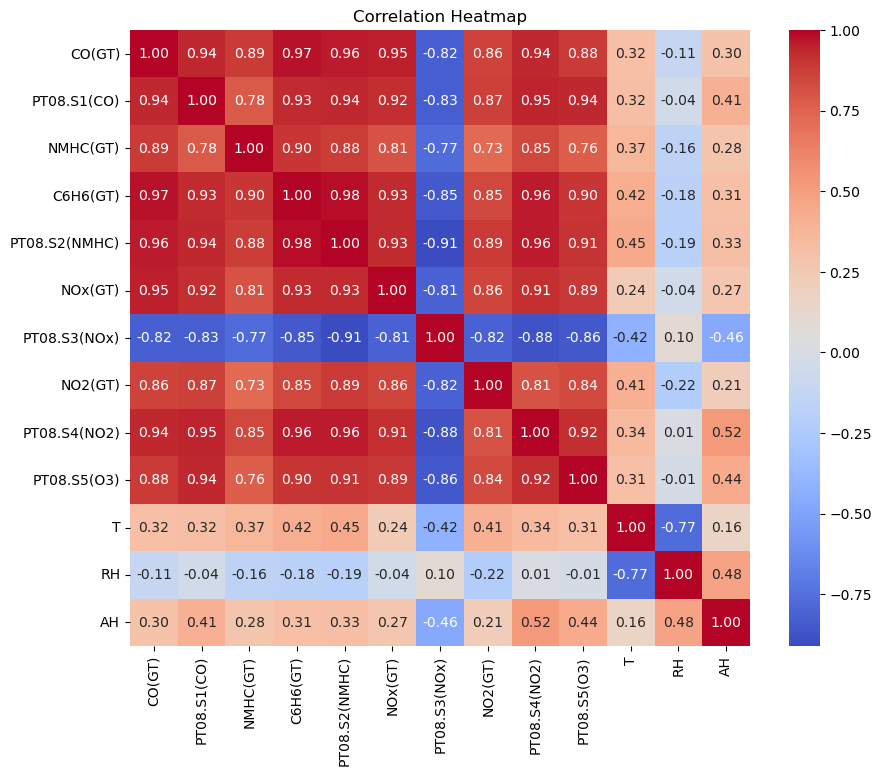

In [189]:
# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [73]:
features = data.drop('AH', axis=1)
target = data['AH']

In [75]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [235]:
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [237]:
model_ann = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [238]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_ann = model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 170ms/step - loss: 0.6681 - mae: 0.7631 - val_loss: 0.0320 - val_mae: 0.1429
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0571 - mae: 0.1759 - val_loss: 0.0273 - val_mae: 0.1262
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298 - mae: 0.1311 - val_loss: 0.0172 - val_mae: 0.0969
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214 - mae: 0.1127 - val_loss: 0.0163 - val_mae: 0.0916
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0220 - mae: 0.1156 - val_loss: 0.0126 - val_mae: 0.0814
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0177 - mae: 0.1015 - val_loss: 0.0124 - val_mae: 0.0776
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mae: 0.0902 - val_loss: 0.0093 - val_mae: 0.0664
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mae: 0.0915 - val_loss: 0.0080 - val_mae: 0.0608
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131

In [240]:
ann_metrics = model_ann.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0011 - mae: 0.0249


In [241]:
def plot_loss_curves(history, title="Loss Curve"):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_predictions(model, X, y, title="Predicted vs True Values"):
    predictions = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.grid()
    plt.show()

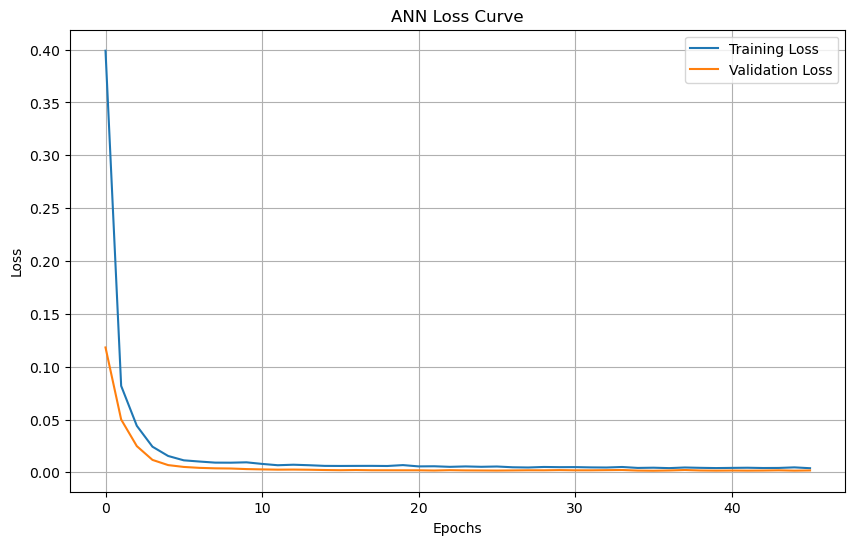

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


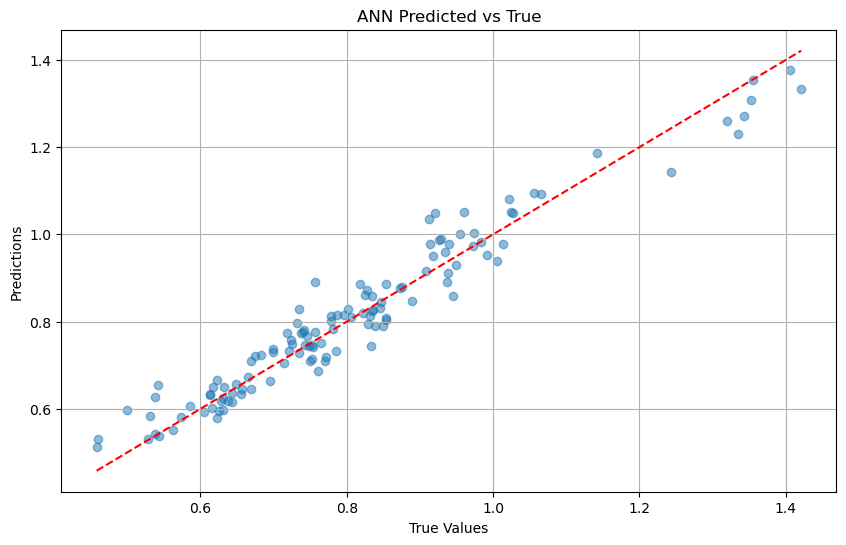

In [211]:
plot_loss_curves(history_ann, title="ANN Loss Curve")
plot_predictions(model_ann, X_test, y_test, title="ANN Predicted vs True")

In [213]:
print("ANN Metrics:", dict(zip(model_ann.metrics_names, ann_metrics)))

ANN Metrics: {'loss': 0.002248576143756509, 'compile_metrics': 0.03705548867583275}


In [215]:
model_rnn = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, activation='relu', return_sequences=False),
    Dense(1, activation='linear')
])
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [219]:
X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [221]:
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [223]:
rnn_history = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

In [224]:
history_rnn = model_rnn.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                            epochs=50, batch_size=32, callbacks=[early_stopping_rnn])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1120 - mae: 0.2609 - val_loss: 0.0301 - val_mae: 0.1410
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0288 - mae: 0.1361 - val_loss: 0.0090 - val_mae: 0.0761
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mae: 0.0842 - val_loss: 0.0042 - val_mae: 0.0489
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mae: 0.0650 - val_loss: 0.0043 - val_mae: 0.0485
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mae: 0.0590 - val_loss: 0.0040 - val_mae: 0.0510
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mae: 0.0770 - val_loss: 0.0035 - val_mae: 0.0430
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mae: 0.0629 - val_loss: 0.0030 - val_mae: 0.0429
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mae: 0.0608 - val_loss: 0.0033 - val_mae: 0.0405
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mae:

In [231]:
rnn_metrics = model_rnn.evaluate(X_test_rnn, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0415 


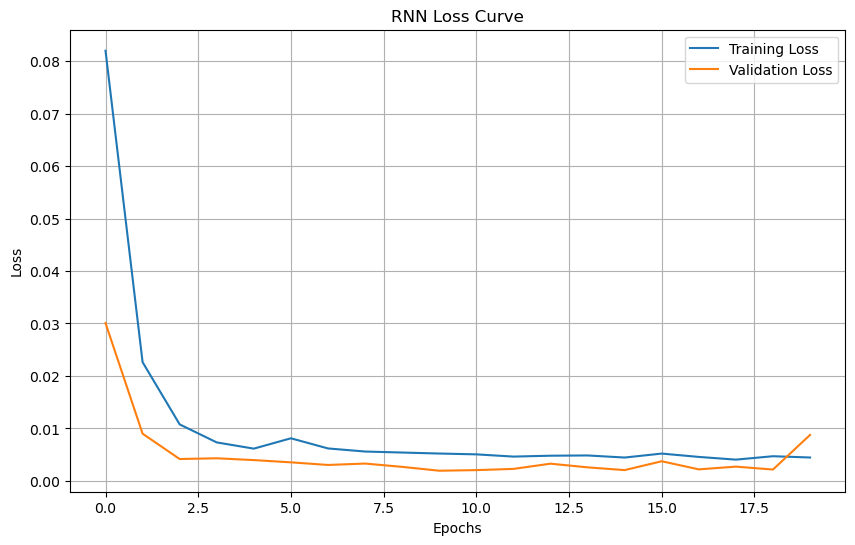

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


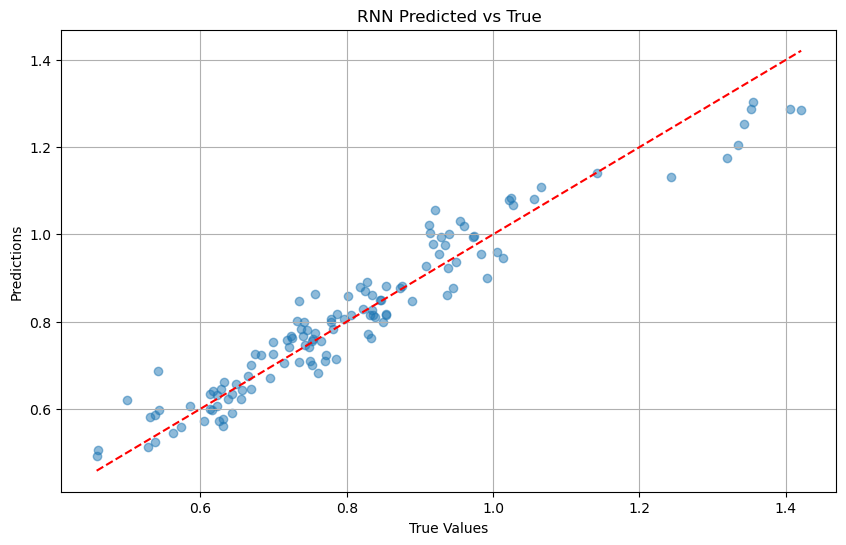

In [233]:
plot_loss_curves(history_rnn, title="RNN Loss Curve")
plot_predictions(model_rnn, X_test_rnn, y_test, title="RNN Predicted vs True")

In [113]:
from tensorflow.keras.optimizers import Adam

# Experiment with different hyperparameters
learning_rates = [1e-5, 1e-4, 1e-3]
units = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
epochs = 50

best_model_ann = None
best_val_loss = float('inf')

# Loop over combinations of hyperparameters
for lr in learning_rates:
    for unit in units:
        for dropout in dropout_rates:
            # Define the model
            model_ann = Sequential([
                Dense(unit, activation='relu', input_dim=X_train.shape[1]),
                Dropout(dropout),
                Dense(unit, activation='relu'),
                Dense(1, activation='linear')
            ])
            model_ann.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])

            # Train the model
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            history_ann = model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                                        epochs=epochs, batch_size=32, callbacks=[early_stopping])

            # Evaluate the model
            val_loss = history_ann.history['val_loss'][-1]
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_ann = model_ann

print(f"Best ANN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}")

Epoch 1/50


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5662 - mae: 0.7285 - val_loss: 0.5837 - val_mae: 0.7435
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5482 - mae: 0.7178 - val_loss: 0.5694 - val_mae: 0.7341
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5292 - mae: 0.7020 - val_loss: 0.5553 - val_mae: 0.7247
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5256 - mae: 0.6988 - val_loss: 0.5414 - val_mae: 0.7153
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5099 - mae: 0.6872 - val_loss: 0.5278 - val_mae: 0.7060
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4948 - mae: 0.6774 - val_loss: 0.5141 - val_mae: 0.6964
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4773 - mae: 0.6619 - val_loss: 0.5005 - val_mae: 0.6868
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4682 - mae: 0.6580 - val_loss: 0.4871 - val_mae: 0.6772
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4556 - mae: 0.6459 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4991 - mae: 0.6852 - val_loss: 0.4826 - val_mae: 0.6769
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5010 - mae: 0.6862 - val_loss: 0.4694 - val_mae: 0.6672
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4656 - mae: 0.6616 - val_loss: 0.4567 - val_mae: 0.6576
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4613 - mae: 0.6586 - val_loss: 0.4442 - val_mae: 0.6480
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4731 - mae: 0.6677 - val_loss: 0.4320 - val_mae: 0.6386
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4452 - mae: 0.6421 - val_loss: 0.4200 - val_mae: 0.6291
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4402 - mae: 0.6430 - val_loss: 0.4082 - val_mae: 0.6197
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4050 - mae: 0.6110 - val_loss: 0.3969 - val_mae: 0.6105
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3986 - mae: 0.6081 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1402 - mae: 1.0401 - val_loss: 1.0134 - val_mae: 0.9874
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1308 - mae: 1.0358 - val_loss: 0.9949 - val_mae: 0.9783
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1038 - mae: 1.0253 - val_loss: 0.9771 - val_mae: 0.9695
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0926 - mae: 1.0163 - val_loss: 0.9600 - val_mae: 0.9609
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0475 - mae: 1.0004 - val_loss: 0.9432 - val_mae: 0.9524
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0490 - mae: 0.9958 - val_loss: 0.9264 - val_mae: 0.9438
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0090 - mae: 0.9772 - val_loss: 0.9102 - val_mae: 0.9354
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0306 - mae: 0.9861 - val_loss: 0.8941 - val_mae: 0.9270
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9948 - mae: 0.9684 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4635 - mae: 0.6580 - val_loss: 0.4803 - val_mae: 0.6735
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4558 - mae: 0.6517 - val_loss: 0.4558 - val_mae: 0.6551
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4045 - mae: 0.6132 - val_loss: 0.4323 - val_mae: 0.6369
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4034 - mae: 0.6110 - val_loss: 0.4097 - val_mae: 0.6189
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3657 - mae: 0.5796 - val_loss: 0.3879 - val_mae: 0.6011
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3479 - mae: 0.5628 - val_loss: 0.3674 - val_mae: 0.5836
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3464 - mae: 0.5595 - val_loss: 0.3473 - val_mae: 0.5661
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2981 - mae: 0.5180 - val_loss: 0.3278 - val_mae: 0.5484
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2991 - mae: 0.5154 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9298 - mae: 0.9426 - val_loss: 0.9411 - val_mae: 0.9526
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9199 - mae: 0.9361 - val_loss: 0.9121 - val_mae: 0.9377
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9274 - mae: 0.9380 - val_loss: 0.8836 - val_mae: 0.9228
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8836 - mae: 0.9180 - val_loss: 0.8561 - val_mae: 0.9083
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8536 - mae: 0.9007 - val_loss: 0.8295 - val_mae: 0.8939
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7795 - mae: 0.8637 - val_loss: 0.8040 - val_mae: 0.8798
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7711 - mae: 0.8576 - val_loss: 0.7785 - val_mae: 0.8656
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7507 - mae: 0.8449 - val_loss: 0.7537 - val_mae: 0.8515
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7271 - mae: 0.8314 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5872 - mae: 0.7426 - val_loss: 0.5937 - val_mae: 0.7528
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5522 - mae: 0.7216 - val_loss: 0.5697 - val_mae: 0.7368
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5578 - mae: 0.7195 - val_loss: 0.5467 - val_mae: 0.7211
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5081 - mae: 0.6865 - val_loss: 0.5247 - val_mae: 0.7057
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4834 - mae: 0.6684 - val_loss: 0.5031 - val_mae: 0.6902
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4675 - mae: 0.6553 - val_loss: 0.4821 - val_mae: 0.6748
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4702 - mae: 0.6578 - val_loss: 0.4618 - val_mae: 0.6596
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4309 - mae: 0.6264 - val_loss: 0.4424 - val_mae: 0.6446
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4022 - mae: 0.6072 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7921 - mae: 0.8713 - val_loss: 0.7356 - val_mae: 0.8418
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7500 - mae: 0.8486 - val_loss: 0.6836 - val_mae: 0.8108
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6803 - mae: 0.8053 - val_loss: 0.6349 - val_mae: 0.7806
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6384 - mae: 0.7806 - val_loss: 0.5891 - val_mae: 0.7511
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5931 - mae: 0.7495 - val_loss: 0.5457 - val_mae: 0.7218
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5565 - mae: 0.7239 - val_loss: 0.5043 - val_mae: 0.6927
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5126 - mae: 0.6951 - val_loss: 0.4659 - val_mae: 0.6645
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4584 - mae: 0.6562 - val_loss: 0.4303 - val_mae: 0.6371
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4380 - mae: 0.6401 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5746 - mae: 0.7379 - val_loss: 0.5517 - val_mae: 0.7253
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5305 - mae: 0.7090 - val_loss: 0.5129 - val_mae: 0.6984
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5142 - mae: 0.6948 - val_loss: 0.4763 - val_mae: 0.6720
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4596 - mae: 0.6588 - val_loss: 0.4414 - val_mae: 0.6458
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4110 - mae: 0.6202 - val_loss: 0.4090 - val_mae: 0.6204
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3928 - mae: 0.6053 - val_loss: 0.3778 - val_mae: 0.5948
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3622 - mae: 0.5802 - val_loss: 0.3485 - val_mae: 0.5697
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3339 - mae: 0.5515 - val_loss: 0.3211 - val_mae: 0.5450
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2956 - mae: 0.5199 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8962 - mae: 0.9263 - val_loss: 0.7970 - val_mae: 0.8745
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8382 - mae: 0.8909 - val_loss: 0.7412 - val_mae: 0.8428
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7628 - mae: 0.8499 - val_loss: 0.6885 - val_mae: 0.8118
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7260 - mae: 0.8297 - val_loss: 0.6382 - val_mae: 0.7809
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6561 - mae: 0.7867 - val_loss: 0.5912 - val_mae: 0.7509
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6256 - mae: 0.7668 - val_loss: 0.5465 - val_mae: 0.7212
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5828 - mae: 0.7383 - val_loss: 0.5047 - val_mae: 0.6922
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5329 - mae: 0.7059 - val_loss: 0.4654 - val_mae: 0.6637
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 - mae: 0.6780 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7209 - mae: 0.8264 - val_loss: 0.6444 - val_mae: 0.7842
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5942 - mae: 0.7479 - val_loss: 0.5301 - val_mae: 0.7073
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4917 - mae: 0.6712 - val_loss: 0.4322 - val_mae: 0.6330
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3865 - mae: 0.5919 - val_loss: 0.3483 - val_mae: 0.5605
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3121 - mae: 0.5186 - val_loss: 0.2763 - val_mae: 0.4885
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2477 - mae: 0.4479 - val_loss: 0.2172 - val_mae: 0.4218
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1812 - mae: 0.3756 - val_loss: 0.1704 - val_mae: 0.3617
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1536 - mae: 0.3436 - val_loss: 0.1349 - val_mae: 0.3140
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1384 - mae: 0.3216 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7621 - mae: 0.8532 - val_loss: 0.5912 - val_mae: 0.7532
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6085 - mae: 0.7570 - val_loss: 0.4768 - val_mae: 0.6731
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4847 - mae: 0.6753 - val_loss: 0.3796 - val_mae: 0.5956
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3822 - mae: 0.5917 - val_loss: 0.2976 - val_mae: 0.5201
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3146 - mae: 0.5242 - val_loss: 0.2294 - val_mae: 0.4469
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2367 - mae: 0.4459 - val_loss: 0.1748 - val_mae: 0.3789
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1937 - mae: 0.3914 - val_loss: 0.1339 - val_mae: 0.3212
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1418 - mae: 0.3264 - val_loss: 0.1028 - val_mae: 0.2729
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1177 - mae: 0.2920 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.8204 - mae: 0.8836 - val_loss: 0.6971 - val_mae: 0.8201
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6606 - mae: 0.7881 - val_loss: 0.5665 - val_mae: 0.7372
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5109 - mae: 0.6919 - val_loss: 0.4561 - val_mae: 0.6590
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3963 - mae: 0.5956 - val_loss: 0.3598 - val_mae: 0.5822
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2836 - mae: 0.5006 - val_loss: 0.2753 - val_mae: 0.5046
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2343 - mae: 0.4468 - val_loss: 0.1984 - val_mae: 0.4204
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1758 - mae: 0.3702 - val_loss: 0.1392 - val_mae: 0.3409
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1384 - mae: 0.3180 - val_loss: 0.0998 - val_mae: 0.2793
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1021 - mae: 0.2643 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8218 - mae: 0.8868 - val_loss: 0.6073 - val_mae: 0.7614
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5335 - mae: 0.7071 - val_loss: 0.3858 - val_mae: 0.5999
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3304 - mae: 0.5470 - val_loss: 0.2295 - val_mae: 0.4508
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1929 - mae: 0.4028 - val_loss: 0.1238 - val_mae: 0.3132
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0982 - mae: 0.2724 - val_loss: 0.0680 - val_mae: 0.2194
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0660 - mae: 0.2156 - val_loss: 0.0450 - val_mae: 0.1724
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0517 - mae: 0.1818 - val_loss: 0.0373 - val_mae: 0.1525
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - mae: 0.1657 - val_loss: 0.0329 - val_mae: 0.1416
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390 - mae: 0.1541 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5276 - mae: 0.7028 - val_loss: 0.3743 - val_mae: 0.5931
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3369 - mae: 0.5526 - val_loss: 0.2182 - val_mae: 0.4438
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1900 - mae: 0.4018 - val_loss: 0.1158 - val_mae: 0.3061
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1063 - mae: 0.2808 - val_loss: 0.0598 - val_mae: 0.1993
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0577 - mae: 0.1972 - val_loss: 0.0377 - val_mae: 0.1535
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0496 - mae: 0.1737 - val_loss: 0.0311 - val_mae: 0.1401
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0414 - mae: 0.1613 - val_loss: 0.0273 - val_mae: 0.1310
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mae: 0.1401 - val_loss: 0.0246 - val_mae: 0.1238
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 - mae: 0.1341 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6014 - mae: 0.7505 - val_loss: 0.4536 - val_mae: 0.6530
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3873 - mae: 0.5970 - val_loss: 0.2964 - val_mae: 0.5211
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2419 - mae: 0.4594 - val_loss: 0.1743 - val_mae: 0.3889
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1382 - mae: 0.3311 - val_loss: 0.0900 - val_mae: 0.2619
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0726 - mae: 0.2234 - val_loss: 0.0438 - val_mae: 0.1639
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0426 - mae: 0.1635 - val_loss: 0.0279 - val_mae: 0.1256
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390 - mae: 0.1521 - val_loss: 0.0230 - val_mae: 0.1145
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - mae: 0.1453 - val_loss: 0.0216 - val_mae: 0.1111
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390 - mae: 0.1509 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5791 - mae: 0.7381 - val_loss: 0.3039 - val_mae: 0.5271
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2388 - mae: 0.4539 - val_loss: 0.0976 - val_mae: 0.2653
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724 - mae: 0.2222 - val_loss: 0.0428 - val_mae: 0.1634
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427 - mae: 0.1580 - val_loss: 0.0334 - val_mae: 0.1454
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0355 - mae: 0.1462 - val_loss: 0.0277 - val_mae: 0.1298
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mae: 0.1423 - val_loss: 0.0235 - val_mae: 0.1177
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mae: 0.1367 - val_loss: 0.0203 - val_mae: 0.1088
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285 - mae: 0.1318 - val_loss: 0.0180 - val_mae: 0.1026
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mae: 0.1195 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.6744 - mae: 0.7972 - val_loss: 0.3982 - val_mae: 0.6107
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3161 - mae: 0.5334 - val_loss: 0.1581 - val_mae: 0.3623
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1234 - mae: 0.3093 - val_loss: 0.0536 - val_mae: 0.1859
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0501 - mae: 0.1804 - val_loss: 0.0333 - val_mae: 0.1473
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 - mae: 0.1564 - val_loss: 0.0270 - val_mae: 0.1316
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 - mae: 0.1426 - val_loss: 0.0225 - val_mae: 0.1176
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - mae: 0.1332 - val_loss: 0.0191 - val_mae: 0.1067
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279 - mae: 0.1285 - val_loss: 0.0166 - val_mae: 0.0982
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220 - mae: 0.1147 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5698 - mae: 0.7312 - val_loss: 0.3058 - val_mae: 0.5285
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2167 - mae: 0.4316 - val_loss: 0.0995 - val_mae: 0.2700
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0772 - mae: 0.2323 - val_loss: 0.0429 - val_mae: 0.1669
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mae: 0.1718 - val_loss: 0.0325 - val_mae: 0.1449
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0456 - mae: 0.1628 - val_loss: 0.0260 - val_mae: 0.1283
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 - mae: 0.1485 - val_loss: 0.0218 - val_mae: 0.1145
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0327 - mae: 0.1389 - val_loss: 0.0176 - val_mae: 0.1019
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mae: 0.1349 - val_loss: 0.0149 - val_mae: 0.0945
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - mae: 0.1329 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3179 - mae: 0.5124 - val_loss: 0.0526 - val_mae: 0.1861
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0684 - mae: 0.1956 - val_loss: 0.0290 - val_mae: 0.1310
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296 - mae: 0.1329 - val_loss: 0.0169 - val_mae: 0.0999
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236 - mae: 0.1225 - val_loss: 0.0138 - val_mae: 0.0900
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232 - mae: 0.1209 - val_loss: 0.0179 - val_mae: 0.1024
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - mae: 0.1059 - val_loss: 0.0094 - val_mae: 0.0751
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - mae: 0.1024 - val_loss: 0.0149 - val_mae: 0.0965
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - mae: 0.1016 - val_loss: 0.0117 - val_mae: 0.0845
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 - mae: 0.0871 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3350 - mae: 0.5113 - val_loss: 0.0461 - val_mae: 0.1631
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724 - mae: 0.2021 - val_loss: 0.0381 - val_mae: 0.1478
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0429 - mae: 0.1586 - val_loss: 0.0250 - val_mae: 0.1156
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0389 - mae: 0.1536 - val_loss: 0.0194 - val_mae: 0.1034
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0365 - mae: 0.1470 - val_loss: 0.0209 - val_mae: 0.1047
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mae: 0.1348 - val_loss: 0.0176 - val_mae: 0.0937
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - mae: 0.1272 - val_loss: 0.0175 - val_mae: 0.0934
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230 - mae: 0.1169 - val_loss: 0.0125 - val_mae: 0.0793
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 - mae: 0.1091 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6192 - mae: 0.7315 - val_loss: 0.0446 - val_mae: 0.1684
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0864 - mae: 0.2305 - val_loss: 0.0247 - val_mae: 0.1197
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0574 - mae: 0.1816 - val_loss: 0.0268 - val_mae: 0.1212
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mae: 0.1614 - val_loss: 0.0203 - val_mae: 0.1016
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361 - mae: 0.1467 - val_loss: 0.0151 - val_mae: 0.0865
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 - mae: 0.1425 - val_loss: 0.0194 - val_mae: 0.1011
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 - mae: 0.1416 - val_loss: 0.0176 - val_mae: 0.0969
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 - mae: 0.1204 - val_loss: 0.0120 - val_mae: 0.0767
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233 - mae: 0.1172 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3956 - mae: 0.5503 - val_loss: 0.0375 - val_mae: 0.1600
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0404 - mae: 0.1565 - val_loss: 0.0193 - val_mae: 0.1012
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 - mae: 0.1090 - val_loss: 0.0113 - val_mae: 0.0743
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mae: 0.1032 - val_loss: 0.0066 - val_mae: 0.0643
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mae: 0.0847 - val_loss: 0.0054 - val_mae: 0.0594
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mae: 0.0778 - val_loss: 0.0035 - val_mae: 0.0424
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0746 - val_loss: 0.0041 - val_mae: 0.0441
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - mae: 0.0678 - val_loss: 0.0069 - val_mae: 0.0657
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - mae: 0.0730 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3764 - mae: 0.5359 - val_loss: 0.0596 - val_mae: 0.1918
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 - mae: 0.1825 - val_loss: 0.0237 - val_mae: 0.1138
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 - mae: 0.1287 - val_loss: 0.0165 - val_mae: 0.0929
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 - mae: 0.1165 - val_loss: 0.0121 - val_mae: 0.0784
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mae: 0.1045 - val_loss: 0.0098 - val_mae: 0.0675
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - mae: 0.0959 - val_loss: 0.0060 - val_mae: 0.0562
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135 - mae: 0.0894 - val_loss: 0.0062 - val_mae: 0.0560
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - mae: 0.0837 - val_loss: 0.0061 - val_mae: 0.0600
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - mae: 0.0786 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5664 - mae: 0.6625 - val_loss: 0.0499 - val_mae: 0.1716
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0666 - mae: 0.1947 - val_loss: 0.0293 - val_mae: 0.1295
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mae: 0.1536 - val_loss: 0.0148 - val_mae: 0.0887
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - mae: 0.1291 - val_loss: 0.0132 - val_mae: 0.0838
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - mae: 0.1108 - val_loss: 0.0130 - val_mae: 0.0828
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - mae: 0.1123 - val_loss: 0.0080 - val_mae: 0.0644
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 - mae: 0.1060 - val_loss: 0.0074 - val_mae: 0.0640
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.1000 - val_loss: 0.0087 - val_mae: 0.0719
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - mae: 0.0930 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3098 - mae: 0.4625 - val_loss: 0.0319 - val_mae: 0.1375
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0328 - mae: 0.1417 - val_loss: 0.0126 - val_mae: 0.0864
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - mae: 0.0974 - val_loss: 0.0061 - val_mae: 0.0566
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - mae: 0.0766 - val_loss: 0.0039 - val_mae: 0.0446
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - mae: 0.0664 - val_loss: 0.0023 - val_mae: 0.0342
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0594 - val_loss: 0.0016 - val_mae: 0.0299
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - mae: 0.0590 - val_loss: 0.0012 - val_mae: 0.0243
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - mae: 0.0574 - val_loss: 0.0020 - val_mae: 0.0305
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mae: 0.0494 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2107 - mae: 0.3761 - val_loss: 0.0520 - val_mae: 0.1910
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mae: 0.1360 - val_loss: 0.0128 - val_mae: 0.0822
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - mae: 0.0999 - val_loss: 0.0072 - val_mae: 0.0619
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - mae: 0.0859 - val_loss: 0.0043 - val_mae: 0.0486
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mae: 0.0762 - val_loss: 0.0039 - val_mae: 0.0446
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - mae: 0.0713 - val_loss: 0.0021 - val_mae: 0.0323
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 - mae: 0.0700 - val_loss: 0.0017 - val_mae: 0.0292
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - mae: 0.0618 - val_loss: 0.0035 - val_mae: 0.0459
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - mae: 0.0579 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2403 - mae: 0.4007 - val_loss: 0.0552 - val_mae: 0.1938
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368 - mae: 0.1469 - val_loss: 0.0163 - val_mae: 0.0929
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220 - mae: 0.1159 - val_loss: 0.0130 - val_mae: 0.0826
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - mae: 0.0924 - val_loss: 0.0082 - val_mae: 0.0652
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - mae: 0.0869 - val_loss: 0.0111 - val_mae: 0.0882
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - mae: 0.0834 - val_loss: 0.0038 - val_mae: 0.0447
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mae: 0.0787 - val_loss: 0.0064 - val_mae: 0.0629
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0745 - val_loss: 0.0089 - val_mae: 0.0817
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - mae: 0.0726 - v

In [115]:
model_ann = Sequential([
        Dense(256, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_ann = model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2162 - mae: 0.3832 - val_loss: 0.0521 - val_mae: 0.1873
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0380 - mae: 0.1554 - val_loss: 0.0140 - val_mae: 0.0843
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mae: 0.1153 - val_loss: 0.0080 - val_mae: 0.0625
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mae: 0.0883 - val_loss: 0.0050 - val_mae: 0.0502
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - mae: 0.0911 - val_loss: 0.0040 - val_mae: 0.0472
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - mae: 0.0842 - val_loss: 0.0027 - val_mae: 0.0386
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - mae: 0.0877 - val_loss: 0.0027 - val_mae: 0.0410
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mae: 0.0806 - val_loss: 0.0041 - val_mae: 0.0521
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - mae:

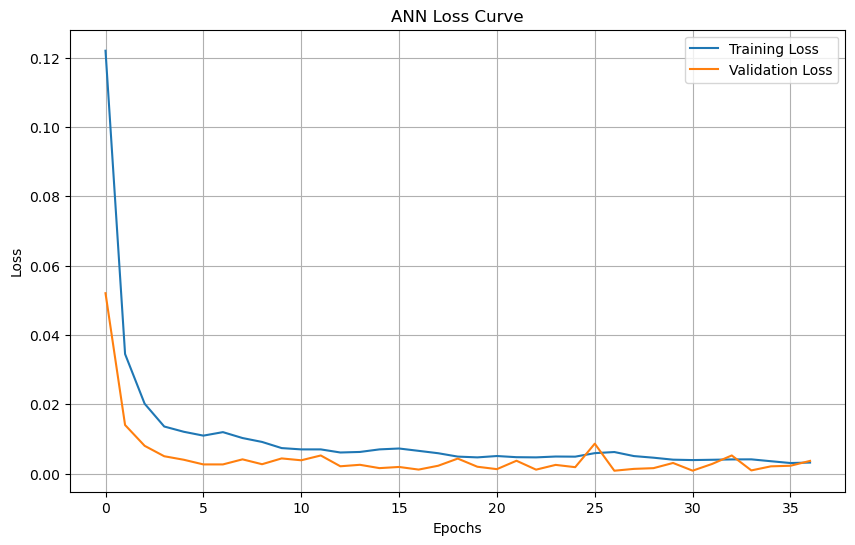

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


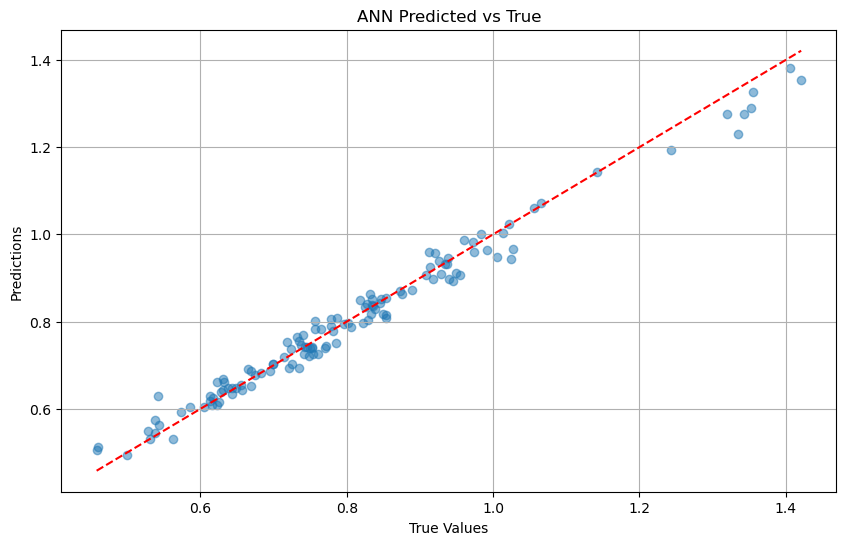

In [119]:
plot_loss_curves(history_ann, title="ANN Loss Curve")
plot_predictions(model_ann, X_test, y_test, title="ANN Predicted vs True")

In [121]:
ann_metrics = model_ann.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0587e-04 - mae: 0.0212 


In [123]:
# from tensorflow.keras.optimizers import Adam, Nadam, RMSprop

# # Experimenting with different hyperparameters for RNN model
# learning_rates = [1e-5, 1e-4, 1e-3]
# rnn_units = [64, 128, 256]
# dropout_rates = [0.2, 0.3, 0.4]
# epochs = 50
# optimizers = [Adam, Nadam, RMSprop]

# best_model_rnn = None
# best_val_loss_rnn = float('inf')

# # Loop over combinations of hyperparameters
# for lr in learning_rates:
#     for unit in rnn_units:
#         for dropout in dropout_rates:
#             for optimizer in optimizers:
#                 print(f"RNN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}, optimizer: {optimizer}")
#                 # Define the RNN model with hyperparameters
#                 model_rnn = Sequential([
#                     SimpleRNN(unit, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
#                     Dropout(dropout),
#                     SimpleRNN(unit // 2, activation='relu', return_sequences=False),
#                     Dense(1, activation='linear')
#                 ])
#                 model_rnn.compile(optimizer=optimizer(learning_rate=lr), loss='mse', metrics=['mae'])

#                 # Reshape input for RNN
#                 X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#                 X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

#                 # Train the RNN model
#                 early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#                 history_rnn = model_rnn.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
#                                             epochs=epochs, batch_size=32, callbacks=[early_stopping_rnn])

#                 # Evaluate the model
#                 val_loss = history_rnn.history['val_loss'][-1]
#                 if val_loss < best_val_loss_rnn:
#                     best_val_loss_rnn = val_loss
#                     best_model_rnn = model_rnn

# print(f"Best RNN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}, optimizer: {optimizer}")


RNN model with learning rate: 1e-05, units: 64, dropout rate: 0.2, optimizer: <class 'keras.src.optimizers.adam.Adam'>
Epoch 1/50


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.5400 - mae: 0.7096 - val_loss: 0.5616 - val_mae: 0.7290
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5251 - mae: 0.6968 - val_loss: 0.5422 - val_mae: 0.7157
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4973 - mae: 0.6787 - val_loss: 0.5214 - val_mae: 0.7011
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4958 - mae: 0.6748 - val_loss: 0.4991 - val_mae: 0.6852
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4451 - mae: 0.6401 - val_loss: 0.4756 - val_mae: 0.6679
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4347 - mae: 0.6324 - val_loss: 0.4507 - val_mae: 0.6492
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3941 - mae: 0.5949 - val_loss: 0.4251 - val_mae: 0.6293
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3852 - mae: 0.5934 - val_loss: 0.3989 - val_mae: 0.6083
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3660 - mae: 0.5693 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5289 - mae: 0.7095 - val_loss: 0.5215 - val_mae: 0.7062
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5020 - mae: 0.6911 - val_loss: 0.5139 - val_mae: 0.7008
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5093 - mae: 0.6945 - val_loss: 0.5062 - val_mae: 0.6954
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5157 - mae: 0.6988 - val_loss: 0.4988 - val_mae: 0.6901
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5059 - mae: 0.6921 - val_loss: 0.4917 - val_mae: 0.6851
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5055 - mae: 0.6943 - val_loss: 0.4846 - val_mae: 0.6800
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4670 - mae: 0.6641 - val_loss: 0.4776 - val_mae: 0.6749
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4872 - mae: 0.6801 - val_loss: 0.4704 - val_mae: 0.6696
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4686 - mae: 0.6646 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.9220 - mae: 0.9385 - val_loss: 0.8730 - val_mae: 0.9156
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9025 - mae: 0.9289 - val_loss: 0.8636 - val_mae: 0.9105
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8951 - mae: 0.9223 - val_loss: 0.8545 - val_mae: 0.9056
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9055 - mae: 0.9299 - val_loss: 0.8461 - val_mae: 0.9010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8954 - mae: 0.9256 - val_loss: 0.8376 - val_mae: 0.8963
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8617 - mae: 0.9070 - val_loss: 0.8293 - val_mae: 0.8918
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8578 - mae: 0.9038 - val_loss: 0.8215 - val_mae: 0.8875
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8654 - mae: 0.9071 - val_loss: 0.8138 - val_mae: 0.8834
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8444 - mae: 0.8936 -

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6933 - mae: 0.8101 - val_loss: 0.6948 - val_mae: 0.8150
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6769 - mae: 0.7963 - val_loss: 0.6691 - val_mae: 0.7994
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6531 - mae: 0.7843 - val_loss: 0.6438 - val_mae: 0.7838
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6582 - mae: 0.7835 - val_loss: 0.6182 - val_mae: 0.7677
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6320 - mae: 0.7681 - val_loss: 0.5926 - val_mae: 0.7513
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6009 - mae: 0.7467 - val_loss: 0.5669 - val_mae: 0.7344
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5607 - mae: 0.7217 - val_loss: 0.5411 - val_mae: 0.7169
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5563 - mae: 0.7194 - val_loss: 0.5168 - val_mae: 0.7001
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5207 - mae: 0.6961 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5867 - mae: 0.7432 - val_loss: 0.6191 - val_mae: 0.7692
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5693 - mae: 0.7317 - val_loss: 0.6063 - val_mae: 0.7610
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5712 - mae: 0.7308 - val_loss: 0.5932 - val_mae: 0.7525
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5392 - mae: 0.7106 - val_loss: 0.5802 - val_mae: 0.7439
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5350 - mae: 0.7087 - val_loss: 0.5673 - val_mae: 0.7354
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5451 - mae: 0.7135 - val_loss: 0.5549 - val_mae: 0.7270
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5166 - mae: 0.6953 - val_loss: 0.5425 - val_mae: 0.7187
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5083 - mae: 0.6871 - val_loss: 0.5300 - val_mae: 0.7101
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4698 - mae: 0.6603 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.8399 - mae: 0.8953 - val_loss: 0.8357 - val_mae: 0.8975
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8515 - mae: 0.9036 - val_loss: 0.8247 - val_mae: 0.8913
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8304 - mae: 0.8911 - val_loss: 0.8139 - val_mae: 0.8852
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8443 - mae: 0.8986 - val_loss: 0.8037 - val_mae: 0.8794
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8227 - mae: 0.8827 - val_loss: 0.7934 - val_mae: 0.8735
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8199 - mae: 0.8844 - val_loss: 0.7830 - val_mae: 0.8675
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8117 - mae: 0.8793 - val_loss: 0.7725 - val_mae: 0.8615
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7941 - mae: 0.8693 - val_loss: 0.7621 - val_mae: 0.8554
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7721 - mae: 0.8571 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.7296 - mae: 0.8360 - val_loss: 0.7362 - val_mae: 0.8404
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7376 - mae: 0.8404 - val_loss: 0.7301 - val_mae: 0.8368
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7239 - mae: 0.8328 - val_loss: 0.7240 - val_mae: 0.8333
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7205 - mae: 0.8321 - val_loss: 0.7181 - val_mae: 0.8298
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7395 - mae: 0.8403 - val_loss: 0.7125 - val_mae: 0.8265
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6945 - mae: 0.8140 - val_loss: 0.7070 - val_mae: 0.8232
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7253 - mae: 0.8347 - val_loss: 0.7012 - val_mae: 0.8198
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6854 - mae: 0.8100 - val_loss: 0.6958 - val_mae: 0.8166
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7025 - mae: 0.8191 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.0668 - mae: 1.0074 - val_loss: 1.0347 - val_mae: 0.9996
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0653 - mae: 1.0070 - val_loss: 1.0063 - val_mae: 0.9855
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0217 - mae: 0.9851 - val_loss: 0.9780 - val_mae: 0.9712
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0183 - mae: 0.9840 - val_loss: 0.9506 - val_mae: 0.9572
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9856 - mae: 0.9674 - val_loss: 0.9240 - val_mae: 0.9433
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9540 - mae: 0.9500 - val_loss: 0.8980 - val_mae: 0.9295
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9041 - mae: 0.9260 - val_loss: 0.8724 - val_mae: 0.9157
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8922 - mae: 0.9180 - val_loss: 0.8473 - val_mae: 0.9019
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8743 - mae: 0.9122 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5264 - mae: 0.6964 - val_loss: 0.5150 - val_mae: 0.6982
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5094 - mae: 0.6854 - val_loss: 0.4981 - val_mae: 0.6863
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4875 - mae: 0.6660 - val_loss: 0.4824 - val_mae: 0.6750
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4707 - mae: 0.6563 - val_loss: 0.4666 - val_mae: 0.6634
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4661 - mae: 0.6543 - val_loss: 0.4515 - val_mae: 0.6521
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4410 - mae: 0.6331 - val_loss: 0.4372 - val_mae: 0.6413
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4235 - mae: 0.6176 - val_loss: 0.4225 - val_mae: 0.6298
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4213 - mae: 0.6169 - val_loss: 0.4074 - val_mae: 0.6178
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3960 - mae: 0.5962 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.6768 - mae: 0.8017 - val_loss: 0.6656 - val_mae: 0.7979
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6343 - mae: 0.7750 - val_loss: 0.6267 - val_mae: 0.7733
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6055 - mae: 0.7576 - val_loss: 0.5866 - val_mae: 0.7471
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5800 - mae: 0.7399 - val_loss: 0.5451 - val_mae: 0.7191
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5211 - mae: 0.7014 - val_loss: 0.5037 - val_mae: 0.6899
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4852 - mae: 0.6735 - val_loss: 0.4615 - val_mae: 0.6588
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4520 - mae: 0.6472 - val_loss: 0.4202 - val_mae: 0.6269
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4065 - mae: 0.6118 - val_loss: 0.3810 - val_mae: 0.5949
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3688 - mae: 0.5796 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.6541 - mae: 0.7896 - val_loss: 0.6332 - val_mae: 0.7792
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6203 - mae: 0.7707 - val_loss: 0.6115 - val_mae: 0.7655
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5928 - mae: 0.7509 - val_loss: 0.5881 - val_mae: 0.7503
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5691 - mae: 0.7375 - val_loss: 0.5643 - val_mae: 0.7346
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5607 - mae: 0.7306 - val_loss: 0.5396 - val_mae: 0.7179
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5267 - mae: 0.7070 - val_loss: 0.5141 - val_mae: 0.7003
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5094 - mae: 0.6957 - val_loss: 0.4879 - val_mae: 0.6816
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4624 - mae: 0.6602 - val_loss: 0.4606 - val_mae: 0.6616
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4602 - mae: 0.6580 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.6359 - mae: 0.7768 - val_loss: 0.6081 - val_mae: 0.7623
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5953 - mae: 0.7521 - val_loss: 0.5875 - val_mae: 0.7490
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5854 - mae: 0.7454 - val_loss: 0.5682 - val_mae: 0.7363
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5876 - mae: 0.7454 - val_loss: 0.5488 - val_mae: 0.7233
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5358 - mae: 0.7119 - val_loss: 0.5290 - val_mae: 0.7098
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5414 - mae: 0.7151 - val_loss: 0.5094 - val_mae: 0.6961
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5163 - mae: 0.6970 - val_loss: 0.4899 - val_mae: 0.6821
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5108 - mae: 0.6937 - val_loss: 0.4698 - val_mae: 0.6674
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4684 - mae: 0.6659 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.6915 - mae: 0.8097 - val_loss: 0.6642 - val_mae: 0.7979
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6724 - mae: 0.7989 - val_loss: 0.6428 - val_mae: 0.7846
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6266 - mae: 0.7701 - val_loss: 0.6216 - val_mae: 0.7713
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6189 - mae: 0.7647 - val_loss: 0.6004 - val_mae: 0.7576
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5907 - mae: 0.7455 - val_loss: 0.5791 - val_mae: 0.7437
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5773 - mae: 0.7381 - val_loss: 0.5574 - val_mae: 0.7293
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5420 - mae: 0.7147 - val_loss: 0.5355 - val_mae: 0.7144
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5444 - mae: 0.7162 - val_loss: 0.5126 - val_mae: 0.6984
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5021 - mae: 0.6850 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5008 - mae: 0.6870 - val_loss: 0.5053 - val_mae: 0.6937
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4666 - mae: 0.6641 - val_loss: 0.4767 - val_mae: 0.6732
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4462 - mae: 0.6455 - val_loss: 0.4478 - val_mae: 0.6517
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4176 - mae: 0.6259 - val_loss: 0.4192 - val_mae: 0.6296
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3712 - mae: 0.5881 - val_loss: 0.3904 - val_mae: 0.6067
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3488 - mae: 0.5690 - val_loss: 0.3595 - val_mae: 0.5811
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3301 - mae: 0.5526 - val_loss: 0.3278 - val_mae: 0.5535
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2930 - mae: 0.5173 - val_loss: 0.2947 - val_mae: 0.5229
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2718 - mae: 0.4946 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.8724 - mae: 0.9139 - val_loss: 0.8131 - val_mae: 0.8840
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8376 - mae: 0.8957 - val_loss: 0.7846 - val_mae: 0.8681
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8149 - mae: 0.8835 - val_loss: 0.7582 - val_mae: 0.8531
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7952 - mae: 0.8700 - val_loss: 0.7341 - val_mae: 0.8393
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7484 - mae: 0.8444 - val_loss: 0.7113 - val_mae: 0.8260
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7230 - mae: 0.8312 - val_loss: 0.6902 - val_mae: 0.8135
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7047 - mae: 0.8191 - val_loss: 0.6692 - val_mae: 0.8007
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6753 - mae: 0.8033 - val_loss: 0.6487 - val_mae: 0.7881
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6434 - mae: 0.7834 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5517 - mae: 0.7221 - val_loss: 0.5443 - val_mae: 0.7207
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5190 - mae: 0.7016 - val_loss: 0.5170 - val_mae: 0.7021
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4969 - mae: 0.6845 - val_loss: 0.4888 - val_mae: 0.6823
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5006 - mae: 0.6860 - val_loss: 0.4600 - val_mae: 0.6615
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4545 - mae: 0.6513 - val_loss: 0.4307 - val_mae: 0.6396
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4267 - mae: 0.6329 - val_loss: 0.4010 - val_mae: 0.6165
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4120 - mae: 0.6201 - val_loss: 0.3715 - val_mae: 0.5927
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3729 - mae: 0.5874 - val_loss: 0.3427 - val_mae: 0.5685
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3412 - mae: 0.5579 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.1618 - mae: 1.0551 - val_loss: 1.1278 - val_mae: 1.0420
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1036 - mae: 1.0268 - val_loss: 1.0634 - val_mae: 1.0114
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0691 - mae: 1.0098 - val_loss: 0.9987 - val_mae: 0.9799
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9884 - mae: 0.9703 - val_loss: 0.9363 - val_mae: 0.9484
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9513 - mae: 0.9526 - val_loss: 0.8733 - val_mae: 0.9156
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8957 - mae: 0.9247 - val_loss: 0.8078 - val_mae: 0.8801
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8072 - mae: 0.8766 - val_loss: 0.7389 - val_mae: 0.8413
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7605 - mae: 0.8500 - val_loss: 0.6695 - val_mae: 0.8002
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7227 - mae: 0.8214 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.6915 - mae: 0.8052 - val_loss: 0.6604 - val_mae: 0.7939
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6621 - mae: 0.7884 - val_loss: 0.6373 - val_mae: 0.7795
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6385 - mae: 0.7709 - val_loss: 0.6152 - val_mae: 0.7654
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6261 - mae: 0.7620 - val_loss: 0.5910 - val_mae: 0.7495
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5820 - mae: 0.7348 - val_loss: 0.5662 - val_mae: 0.7329
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5505 - mae: 0.7149 - val_loss: 0.5396 - val_mae: 0.7145
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5347 - mae: 0.7045 - val_loss: 0.5145 - val_mae: 0.6967
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5043 - mae: 0.6811 - val_loss: 0.4871 - val_mae: 0.6767
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4702 - mae: 0.6552 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1.4186 - mae: 1.1689 - val_loss: 1.3062 - val_mae: 1.1236
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2788 - mae: 1.1092 - val_loss: 1.1934 - val_mae: 1.0735
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1699 - mae: 1.0618 - val_loss: 1.0951 - val_mae: 1.0277
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0688 - mae: 1.0138 - val_loss: 1.0083 - val_mae: 0.9855
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0234 - mae: 0.9890 - val_loss: 0.9306 - val_mae: 0.9462
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9304 - mae: 0.9445 - val_loss: 0.8596 - val_mae: 0.9088
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8570 - mae: 0.9043 - val_loss: 0.7913 - val_mae: 0.8714
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7691 - mae: 0.8591 - val_loss: 0.7247 - val_mae: 0.8332
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7341 - mae: 0.8362

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6257 - mae: 0.7728 - val_loss: 0.6011 - val_mae: 0.7588
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5745 - mae: 0.7414 - val_loss: 0.5502 - val_mae: 0.7253
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5233 - mae: 0.7045 - val_loss: 0.4991 - val_mae: 0.6898
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4907 - mae: 0.6796 - val_loss: 0.4481 - val_mae: 0.6524
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4198 - mae: 0.6286 - val_loss: 0.3941 - val_mae: 0.6103
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3784 - mae: 0.5937 - val_loss: 0.3372 - val_mae: 0.5621
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3203 - mae: 0.5431 - val_loss: 0.2778 - val_mae: 0.5064
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2563 - mae: 0.4806 - val_loss: 0.2162 - val_mae: 0.4410
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1988 - mae: 0.4160 -

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.8687 - mae: 0.9132 - val_loss: 0.8029 - val_mae: 0.8775
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7968 - mae: 0.8741 - val_loss: 0.7421 - val_mae: 0.8433
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7293 - mae: 0.8363 - val_loss: 0.6900 - val_mae: 0.8129
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6769 - mae: 0.8043 - val_loss: 0.6420 - val_mae: 0.7836
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6263 - mae: 0.7723 - val_loss: 0.5956 - val_mae: 0.7542
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5927 - mae: 0.7509 - val_loss: 0.5493 - val_mae: 0.7236
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5369 - mae: 0.7137 - val_loss: 0.5058 - val_mae: 0.6936
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4947 - mae: 0.6857 - val_loss: 0.4612 - val_mae: 0.6612
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4728 - mae: 0.6676

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.8463 - mae: 0.9012 - val_loss: 0.7818 - val_mae: 0.8661
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7806 - mae: 0.8630 - val_loss: 0.7203 - val_mae: 0.8307
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7278 - mae: 0.8327 - val_loss: 0.6600 - val_mae: 0.7943
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6685 - mae: 0.7970 - val_loss: 0.5978 - val_mae: 0.7549
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6082 - mae: 0.7591 - val_loss: 0.5357 - val_mae: 0.7133
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5498 - mae: 0.7195 - val_loss: 0.4726 - val_mae: 0.6682
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4935 - mae: 0.6761 - val_loss: 0.4072 - val_mae: 0.6179
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4051 - mae: 0.6133 - val_loss: 0.3404 - val_mae: 0.5615
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3427 - mae: 0.5552

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5576 - mae: 0.7247 - val_loss: 0.5230 - val_mae: 0.7050
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4838 - mae: 0.6738 - val_loss: 0.4657 - val_mae: 0.6642
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4425 - mae: 0.6414 - val_loss: 0.4064 - val_mae: 0.6191
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3790 - mae: 0.5941 - val_loss: 0.3481 - val_mae: 0.5712
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3331 - mae: 0.5540 - val_loss: 0.2893 - val_mae: 0.5180
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2633 - mae: 0.4890 - val_loss: 0.2295 - val_mae: 0.4572
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2052 - mae: 0.4262 - val_loss: 0.1732 - val_mae: 0.3908
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1646 - mae: 0.3709 - val_loss: 0.1224 - val_mae: 0.3178
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1098 - mae: 0.2

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.9896 - mae: 0.9745 - val_loss: 0.9391 - val_mae: 0.9500
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8950 - mae: 0.9242 - val_loss: 0.8753 - val_mae: 0.9168
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8659 - mae: 0.9097 - val_loss: 0.8202 - val_mae: 0.8872
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8062 - mae: 0.8768 - val_loss: 0.7717 - val_mae: 0.8602
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7501 - mae: 0.8459 - val_loss: 0.7233 - val_mae: 0.8324
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7073 - mae: 0.8213 - val_loss: 0.6745 - val_mae: 0.8034
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6633 - mae: 0.7932 - val_loss: 0.6259 - val_mae: 0.7733
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6207 - mae: 0.7662 - val_loss: 0.5775 - val_mae: 0.7421
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5631 - mae: 0.7312 -

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.7088 - mae: 0.8222 - val_loss: 0.6789 - val_mae: 0.8071
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6498 - mae: 0.7892 - val_loss: 0.6401 - val_mae: 0.7833
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6120 - mae: 0.7633 - val_loss: 0.6003 - val_mae: 0.7580
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5807 - mae: 0.7412 - val_loss: 0.5566 - val_mae: 0.7291
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5310 - mae: 0.7097 - val_loss: 0.5082 - val_mae: 0.6956
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4812 - mae: 0.6738 - val_loss: 0.4506 - val_mae: 0.6535
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4224 - mae: 0.6299 - val_loss: 0.3849 - val_mae: 0.6016
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3615 - mae: 0.5799 - val_loss: 0.3111 - val_mae: 0.5372
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2912 - mae: 0.5151

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.7728 - mae: 0.8589 - val_loss: 0.7225 - val_mae: 0.8328
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6882 - mae: 0.8115 - val_loss: 0.6734 - val_mae: 0.8036
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6507 - mae: 0.7847 - val_loss: 0.6243 - val_mae: 0.7734
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6018 - mae: 0.7576 - val_loss: 0.5757 - val_mae: 0.7423
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5613 - mae: 0.7296 - val_loss: 0.5266 - val_mae: 0.7092
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5111 - mae: 0.6941 - val_loss: 0.4761 - val_mae: 0.6734
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4657 - mae: 0.6621 - val_loss: 0.4215 - val_mae: 0.6321
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4048 - mae: 0.6129 - val_loss: 0.3608 - val_mae: 0.5825
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3470 - mae: 0.5

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.5228 - mae: 0.7030 - val_loss: 0.4973 - val_mae: 0.6872
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4527 - mae: 0.6521 - val_loss: 0.4417 - val_mae: 0.6463
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4072 - mae: 0.6166 - val_loss: 0.3852 - val_mae: 0.6018
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3555 - mae: 0.5744 - val_loss: 0.3288 - val_mae: 0.5537
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2825 - mae: 0.5088 - val_loss: 0.2728 - val_mae: 0.5011
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2555 - mae: 0.4770 - val_loss: 0.2198 - val_mae: 0.4451
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1952 - mae: 0.4110 - val_loss: 0.1683 - val_mae: 0.3820
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1419 - mae: 0.3436 - val_loss: 0.1231 - val_mae: 0.3163
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1115 - mae: 0.2888

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.9166 - mae: 0.9292 - val_loss: 0.6046 - val_mae: 0.7589
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5968 - mae: 0.7385 - val_loss: 0.3794 - val_mae: 0.5960
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3691 - mae: 0.5661 - val_loss: 0.2497 - val_mae: 0.4743
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2314 - mae: 0.4288 - val_loss: 0.1309 - val_mae: 0.3221
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1204 - mae: 0.2922 - val_loss: 0.0599 - val_mae: 0.1978
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mae: 0.2093 - val_loss: 0.0452 - val_mae: 0.1718
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0756 - mae: 0.2123 - val_loss: 0.0400 - val_mae: 0.1604
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0668 - mae: 0.2037 - val_loss: 0.0340 - val_mae: 0.1472
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0530 - mae: 0.1824 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.3868 - mae: 1.1542 - val_loss: 1.1618 - val_mae: 1.0538
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2017 - mae: 1.0705 - val_loss: 0.9659 - val_mae: 0.9600
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9434 - mae: 0.9493 - val_loss: 0.8139 - val_mae: 0.8802
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7966 - mae: 0.8712 - val_loss: 0.6806 - val_mae: 0.8042
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7023 - mae: 0.8143 - val_loss: 0.5694 - val_mae: 0.7350
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5928 - mae: 0.7489 - val_loss: 0.4709 - val_mae: 0.6668
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5135 - mae: 0.6903 - val_loss: 0.3759 - val_mae: 0.5933
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4153 - mae: 0.6172 - val_loss: 0.2811 - val_mae: 0.5089
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3059 - mae: 0.5258 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.7109 - mae: 0.8221 - val_loss: 0.6063 - val_mae: 0.7612
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5926 - mae: 0.7489 - val_loss: 0.5205 - val_mae: 0.7047
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5052 - mae: 0.6902 - val_loss: 0.4297 - val_mae: 0.6385
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4429 - mae: 0.6410 - val_loss: 0.3343 - val_mae: 0.5598
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3188 - mae: 0.5404 - val_loss: 0.2299 - val_mae: 0.4580
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2081 - mae: 0.4280 - val_loss: 0.1332 - val_mae: 0.3377
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1090 - mae: 0.2926 - val_loss: 0.0554 - val_mae: 0.1977
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0513 - mae: 0.1773 - val_loss: 0.0247 - val_mae: 0.1174
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - mae: 0.1356 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.7900 - mae: 0.8688 - val_loss: 0.7090 - val_mae: 0.8238
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7181 - mae: 0.8263 - val_loss: 0.6506 - val_mae: 0.7883
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6244 - mae: 0.7695 - val_loss: 0.5784 - val_mae: 0.7414
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5639 - mae: 0.7263 - val_loss: 0.4651 - val_mae: 0.6615
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4210 - mae: 0.6233 - val_loss: 0.2633 - val_mae: 0.4880
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2210 - mae: 0.4314 - val_loss: 0.0608 - val_mae: 0.1956
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0611 - mae: 0.1959 - val_loss: 0.0326 - val_mae: 0.1478
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mae: 0.1629 - val_loss: 0.0266 - val_mae: 0.1317
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mae: 0.1521 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6315 - mae: 0.7697 - val_loss: 0.5104 - val_mae: 0.6991
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4904 - mae: 0.6696 - val_loss: 0.3224 - val_mae: 0.5527
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2986 - mae: 0.5006 - val_loss: 0.1477 - val_mae: 0.3633
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1590 - mae: 0.3364 - val_loss: 0.0396 - val_mae: 0.1603
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1065 - mae: 0.2554 - val_loss: 0.0269 - val_mae: 0.1322
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - mae: 0.2097 - val_loss: 0.0254 - val_mae: 0.1270
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0788 - mae: 0.2167 - val_loss: 0.0276 - val_mae: 0.1302
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - mae: 0.2101 - val_loss: 0.0233 - val_mae: 0.1190
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mae: 0.1923 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.6397 - mae: 0.7816 - val_loss: 0.5929 - val_mae: 0.7530
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5584 - mae: 0.7239 - val_loss: 0.4755 - val_mae: 0.6714
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4108 - mae: 0.6131 - val_loss: 0.3216 - val_mae: 0.5436
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2661 - mae: 0.4780 - val_loss: 0.1699 - val_mae: 0.3747
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1463 - mae: 0.3290 - val_loss: 0.0742 - val_mae: 0.2192
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808 - mae: 0.2297 - val_loss: 0.0468 - val_mae: 0.1755
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0635 - mae: 0.1990 - val_loss: 0.0495 - val_mae: 0.1768
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - mae: 0.2068 - val_loss: 0.0452 - val_mae: 0.1677
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0614 - mae: 0.1995 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5636 - mae: 0.7284 - val_loss: 0.4491 - val_mae: 0.6536
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4435 - mae: 0.6421 - val_loss: 0.3418 - val_mae: 0.5670
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3287 - mae: 0.5475 - val_loss: 0.2277 - val_mae: 0.4575
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2120 - mae: 0.4233 - val_loss: 0.1207 - val_mae: 0.3198
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1143 - mae: 0.2852 - val_loss: 0.0459 - val_mae: 0.1714
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0622 - mae: 0.1946 - val_loss: 0.0251 - val_mae: 0.1249
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0609 - mae: 0.1979 - val_loss: 0.0244 - val_mae: 0.1219
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - mae: 0.1758 - val_loss: 0.0251 - val_mae: 0.1212
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0550 - mae: 0.1854 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4845 - mae: 0.6713 - val_loss: 0.3937 - val_mae: 0.6109
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4000 - mae: 0.6028 - val_loss: 0.2960 - val_mae: 0.5256
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2940 - mae: 0.5083 - val_loss: 0.1847 - val_mae: 0.4068
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1913 - mae: 0.3908 - val_loss: 0.0862 - val_mae: 0.2581
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1057 - mae: 0.2601 - val_loss: 0.0372 - val_mae: 0.1492
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mae: 0.2176 - val_loss: 0.0310 - val_mae: 0.1350
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mae: 0.1988 - val_loss: 0.0301 - val_mae: 0.1320
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0688 - mae: 0.2024 - val_loss: 0.0279 - val_mae: 0.1263
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mae: 0.1882 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.6953 - mae: 0.8120 - val_loss: 0.6421 - val_mae: 0.7818
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6000 - mae: 0.7503 - val_loss: 0.5260 - val_mae: 0.7058
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4986 - mae: 0.6795 - val_loss: 0.3991 - val_mae: 0.6121
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3449 - mae: 0.5608 - val_loss: 0.2762 - val_mae: 0.5047
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2631 - mae: 0.4776 - val_loss: 0.1656 - val_mae: 0.3818
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1339 - mae: 0.3235 - val_loss: 0.0786 - val_mae: 0.2442
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0683 - mae: 0.2122 - val_loss: 0.0353 - val_mae: 0.1439
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mae: 0.1599 - val_loss: 0.0283 - val_mae: 0.1273
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mae: 0.1573 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.6258 - mae: 0.7678 - val_loss: 0.3224 - val_mae: 0.5478
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2529 - mae: 0.4696 - val_loss: 0.0561 - val_mae: 0.1892
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mae: 0.1788 - val_loss: 0.0384 - val_mae: 0.1616
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mae: 0.1740 - val_loss: 0.0293 - val_mae: 0.1353
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0406 - mae: 0.1599 - val_loss: 0.0230 - val_mae: 0.1214
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mae: 0.1382 - val_loss: 0.0195 - val_mae: 0.1101
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mae: 0.1187 - val_loss: 0.0173 - val_mae: 0.1027
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mae: 0.1265 - val_loss: 0.0158 - val_mae: 0.0992
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mae: 0.1041 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3443 - mae: 0.5603 - val_loss: 0.1796 - val_mae: 0.3906
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1333 - mae: 0.3171 - val_loss: 0.0464 - val_mae: 0.1729
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mae: 0.1689 - val_loss: 0.0369 - val_mae: 0.1534
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mae: 0.1599 - val_loss: 0.0325 - val_mae: 0.1403
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mae: 0.1515 - val_loss: 0.0264 - val_mae: 0.1253
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - mae: 0.1357 - val_loss: 0.0223 - val_mae: 0.1153
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mae: 0.1232 - val_loss: 0.0212 - val_mae: 0.1102
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mae: 0.1180 - val_loss: 0.0187 - val_mae: 0.1033
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mae: 0.1152 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.7644 - mae: 0.8525 - val_loss: 0.5707 - val_mae: 0.7376
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5422 - mae: 0.7136 - val_loss: 0.3688 - val_mae: 0.5873
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3166 - mae: 0.5318 - val_loss: 0.1188 - val_mae: 0.3016
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0927 - mae: 0.2516 - val_loss: 0.0458 - val_mae: 0.1695
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0568 - mae: 0.1857 - val_loss: 0.0344 - val_mae: 0.1503
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mae: 0.1636 - val_loss: 0.0321 - val_mae: 0.1378
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - mae: 0.1522 - val_loss: 0.0290 - val_mae: 0.1296
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296 - mae: 0.1351 - val_loss: 0.0250 - val_mae: 0.1195
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - mae: 0.1313 -

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.6755 - mae: 0.8016 - val_loss: 0.5005 - val_mae: 0.6907
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4720 - mae: 0.6673 - val_loss: 0.2991 - val_mae: 0.5280
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2549 - mae: 0.4787 - val_loss: 0.0806 - val_mae: 0.2458
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mae: 0.2202 - val_loss: 0.0326 - val_mae: 0.1436
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0473 - mae: 0.1683 - val_loss: 0.0265 - val_mae: 0.1281
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mae: 0.1449 - val_loss: 0.0231 - val_mae: 0.1194
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - mae: 0.1391 - val_loss: 0.0209 - val_mae: 0.1131
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - mae: 0.1374 - val_loss: 0.0192 - val_mae: 0.1081
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mae: 0.1359 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4439 - mae: 0.6457 - val_loss: 0.2653 - val_mae: 0.4929
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1579 - mae: 0.3536 - val_loss: 0.0437 - val_mae: 0.1675
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0602 - mae: 0.1912 - val_loss: 0.0390 - val_mae: 0.1557
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0499 - mae: 0.1762 - val_loss: 0.0341 - val_mae: 0.1422
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mae: 0.1649 - val_loss: 0.0284 - val_mae: 0.1264
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mae: 0.1553 - val_loss: 0.0253 - val_mae: 0.1166
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mae: 0.1370 - val_loss: 0.0239 - val_mae: 0.1125
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mae: 0.1340 - val_loss: 0.0207 - val_mae: 0.1048
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0281 - mae: 0.1277 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2384 - mae: 0.4506 - val_loss: 0.0568 - val_mae: 0.1961
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - mae: 0.1900 - val_loss: 0.0345 - val_mae: 0.1495
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mae: 0.1584 - val_loss: 0.0232 - val_mae: 0.1208
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mae: 0.1488 - val_loss: 0.0175 - val_mae: 0.0998
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mae: 0.1272 - val_loss: 0.0145 - val_mae: 0.0944
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mae: 0.1203 - val_loss: 0.0146 - val_mae: 0.0855
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mae: 0.1138 - val_loss: 0.0137 - val_mae: 0.0813
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210 - mae: 0.1114 - val_loss: 0.0113 - val_mae: 0.0746
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mae: 0.0985 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.6733 - mae: 0.8011 - val_loss: 0.5148 - val_mae: 0.6985
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4454 - mae: 0.6417 - val_loss: 0.2556 - val_mae: 0.4824
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1999 - mae: 0.4056 - val_loss: 0.0396 - val_mae: 0.1528
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mae: 0.1615 - val_loss: 0.0304 - val_mae: 0.1423
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mae: 0.1583 - val_loss: 0.0284 - val_mae: 0.1301
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mae: 0.1524 - val_loss: 0.0246 - val_mae: 0.1233
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - mae: 0.1455 - val_loss: 0.0231 - val_mae: 0.1189
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - mae: 0.1455 - val_loss: 0.0219 - val_mae: 0.1141
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mae: 0.1317 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.6449 - mae: 0.7729 - val_loss: 0.4573 - val_mae: 0.6550
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4063 - mae: 0.6024 - val_loss: 0.1907 - val_mae: 0.3980
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1465 - mae: 0.3277 - val_loss: 0.0516 - val_mae: 0.1872
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0771 - mae: 0.2238 - val_loss: 0.0443 - val_mae: 0.1708
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0703 - mae: 0.2068 - val_loss: 0.0369 - val_mae: 0.1558
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0535 - mae: 0.1814 - val_loss: 0.0341 - val_mae: 0.1470
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0489 - mae: 0.1729 - val_loss: 0.0297 - val_mae: 0.1358
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0492 - mae: 0.1725 - val_loss: 0.0254 - val_mae: 0.1249
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mae: 0.154

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.6839 - mae: 0.8038 - val_loss: 0.4516 - val_mae: 0.6532
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3641 - mae: 0.5745 - val_loss: 0.1541 - val_mae: 0.3590
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1046 - mae: 0.2722 - val_loss: 0.0372 - val_mae: 0.1571
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mae: 0.1831 - val_loss: 0.0298 - val_mae: 0.1397
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mae: 0.1735 - val_loss: 0.0237 - val_mae: 0.1242
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - mae: 0.1531 - val_loss: 0.0260 - val_mae: 0.1219
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382 - mae: 0.1478 - val_loss: 0.0301 - val_mae: 0.1298
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 - mae: 0.1362 - val_loss: 0.0179 - val_mae: 0.1078
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mae: 0.1336 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5456 - mae: 0.7129 - val_loss: 0.1773 - val_mae: 0.3919
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1128 - mae: 0.2843 - val_loss: 0.0432 - val_mae: 0.1671
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0484 - mae: 0.1718 - val_loss: 0.0283 - val_mae: 0.1316
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0293 - mae: 0.1357 - val_loss: 0.0180 - val_mae: 0.1060
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0251 - mae: 0.1185 - val_loss: 0.0146 - val_mae: 0.0927
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0193 - mae: 0.1076 - val_loss: 0.0124 - val_mae: 0.0823
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - mae: 0.0964 - val_loss: 0.0110 - val_mae: 0.0822
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - mae: 0.0950 - val_loss: 0.0084 - val_mae: 0.0681
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6506 - mae: 0.7880 - val_loss: 0.4158 - val_mae: 0.6279
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3134 - mae: 0.5284 - val_loss: 0.0423 - val_mae: 0.1668
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0549 - mae: 0.1834 - val_loss: 0.0359 - val_mae: 0.1491
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0370 - mae: 0.1523 - val_loss: 0.0238 - val_mae: 0.1224
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0290 - mae: 0.1265 - val_loss: 0.0183 - val_mae: 0.1037
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 - mae: 0.1212 - val_loss: 0.0137 - val_mae: 0.0884
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196 - mae: 0.1071 - val_loss: 0.0115 - val_mae: 0.0863
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - mae: 0.0981 - val_loss: 0.0097 - val_mae: 0.0691
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - mae: 0.090

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.6555 - mae: 0.7765 - val_loss: 0.1672 - val_mae: 0.3739
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0933 - mae: 0.2605 - val_loss: 0.0430 - val_mae: 0.1680
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0411 - mae: 0.1582 - val_loss: 0.0300 - val_mae: 0.1398
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0302 - mae: 0.1347 - val_loss: 0.0233 - val_mae: 0.1243
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0250 - mae: 0.1211 - val_loss: 0.0151 - val_mae: 0.0949
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0207 - mae: 0.1123 - val_loss: 0.0167 - val_mae: 0.1088
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - mae: 0.1001 - val_loss: 0.0136 - val_mae: 0.0974
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0166 - mae: 0.0996 - val_loss: 0.0256 - val_mae: 0.1266
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0140 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3618 - mae: 0.5656 - val_loss: 0.0513 - val_mae: 0.1834
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0682 - mae: 0.2005 - val_loss: 0.0376 - val_mae: 0.1525
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0343 - mae: 0.1457 - val_loss: 0.0246 - val_mae: 0.1236
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0309 - mae: 0.1334 - val_loss: 0.0199 - val_mae: 0.1074
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0230 - mae: 0.1181 - val_loss: 0.0161 - val_mae: 0.0942
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0194 - mae: 0.1016 - val_loss: 0.0134 - val_mae: 0.0852
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0188 - mae: 0.1071 - val_loss: 0.0112 - val_mae: 0.0769
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0164 - mae: 0.1023 - val_loss: 0.0120 - val_mae: 0.0770
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5856 - mae: 0.7410 - val_loss: 0.1956 - val_mae: 0.4129
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1262 - mae: 0.2987 - val_loss: 0.0393 - val_mae: 0.1619
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0550 - mae: 0.1822 - val_loss: 0.0326 - val_mae: 0.1408
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0394 - mae: 0.1545 - val_loss: 0.0280 - val_mae: 0.1264
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0304 - mae: 0.1350 - val_loss: 0.0191 - val_mae: 0.1068
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0262 - mae: 0.1237 - val_loss: 0.0184 - val_mae: 0.0994
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0233 - mae: 0.1166 - val_loss: 0.0146 - val_mae: 0.0907
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mae: 0.1010 - val_loss: 0.0141 - val_mae: 0.0850
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183 - mae: 0.10

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4039 - mae: 0.5972 - val_loss: 0.0370 - val_mae: 0.1551
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0461 - mae: 0.1700 - val_loss: 0.0351 - val_mae: 0.1453
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0341 - mae: 0.1408 - val_loss: 0.0187 - val_mae: 0.1065
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213 - mae: 0.1116 - val_loss: 0.0251 - val_mae: 0.1168
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0208 - mae: 0.1105 - val_loss: 0.0212 - val_mae: 0.1250
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0185 - mae: 0.1069 - val_loss: 0.0127 - val_mae: 0.0929
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0201 - mae: 0.1088 - val_loss: 0.0217 - val_mae: 0.1303
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166 - mae: 0.0980 - val_loss: 0.0221 - val_mae: 0.1350
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - mae: 0.094

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.6203 - mae: 0.7609 - val_loss: 0.1985 - val_mae: 0.4127
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1225 - mae: 0.2974 - val_loss: 0.0457 - val_mae: 0.1712
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0560 - mae: 0.1844 - val_loss: 0.0354 - val_mae: 0.1476
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0449 - mae: 0.1648 - val_loss: 0.0295 - val_mae: 0.1322
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0323 - mae: 0.1385 - val_loss: 0.0210 - val_mae: 0.1123
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327 - mae: 0.1421 - val_loss: 0.0192 - val_mae: 0.1027
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0249 - mae: 0.1232 - val_loss: 0.0143 - val_mae: 0.0919
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0235 - mae: 0.1206 - val_loss: 0.0128 - val_mae: 0.0839
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253 - mae: 0.12

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6489 - mae: 0.7836 - val_loss: 0.3267 - val_mae: 0.5472
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2127 - mae: 0.4101 - val_loss: 0.0531 - val_mae: 0.1868
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0667 - mae: 0.2016 - val_loss: 0.0462 - val_mae: 0.1667
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0403 - mae: 0.1593 - val_loss: 0.0322 - val_mae: 0.1384
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0372 - mae: 0.1473 - val_loss: 0.0304 - val_mae: 0.1303
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - mae: 0.1339 - val_loss: 0.0211 - val_mae: 0.1084
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0286 - mae: 0.1313 - val_loss: 0.0191 - val_mae: 0.1004
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0252 - mae: 0.1194 - val_loss: 0.0206 - val_mae: 0.1030
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0246 - mae: 0.1163

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4259 - mae: 0.6034 - val_loss: 0.0396 - val_mae: 0.1583
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0558 - mae: 0.1795 - val_loss: 0.0230 - val_mae: 0.1180
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0341 - mae: 0.1425 - val_loss: 0.0172 - val_mae: 0.0984
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0292 - mae: 0.1304 - val_loss: 0.0132 - val_mae: 0.0867
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213 - mae: 0.1119 - val_loss: 0.0176 - val_mae: 0.0972
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0207 - mae: 0.1087 - val_loss: 0.0209 - val_mae: 0.1106
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0196 - mae: 0.1081 - val_loss: 0.0120 - val_mae: 0.0780
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - mae: 0.0966 - val_loss: 0.0069 - val_mae: 0.0623
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6916 - mae: 0.8044 - val_loss: 0.1075 - val_mae: 0.2857
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0815 - mae: 0.2271 - val_loss: 0.0432 - val_mae: 0.1650
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mae: 0.1624 - val_loss: 0.0186 - val_mae: 0.1052
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mae: 0.1346 - val_loss: 0.0164 - val_mae: 0.0962
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mae: 0.1345 - val_loss: 0.0167 - val_mae: 0.0940
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mae: 0.1116 - val_loss: 0.0149 - val_mae: 0.0879
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mae: 0.1178 - val_loss: 0.0117 - val_mae: 0.0799
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - mae: 0.0993 - val_loss: 0.0101 - val_mae: 0.0751
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mae: 0.1008 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.3256 - mae: 0.5042 - val_loss: 0.0237 - val_mae: 0.1241
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0330 - mae: 0.1402 - val_loss: 0.0138 - val_mae: 0.0872
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mae: 0.1171 - val_loss: 0.0106 - val_mae: 0.0775
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mae: 0.1020 - val_loss: 0.0100 - val_mae: 0.0698
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mae: 0.0883 - val_loss: 0.0070 - val_mae: 0.0574
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mae: 0.0862 - val_loss: 0.0046 - val_mae: 0.0487
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mae: 0.0820 - val_loss: 0.0029 - val_mae: 0.0364
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0655 - val_loss: 0.0033 - val_mae: 0.0477
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0668 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1864 - mae: 0.3435 - val_loss: 0.0329 - val_mae: 0.1402
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323 - mae: 0.1355 - val_loss: 0.0636 - val_mae: 0.2282
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - mae: 0.1340 - val_loss: 0.0153 - val_mae: 0.1064
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - mae: 0.1206 - val_loss: 0.0378 - val_mae: 0.1699
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mae: 0.1122 - val_loss: 0.0161 - val_mae: 0.0999
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mae: 0.0977 - val_loss: 0.0051 - val_mae: 0.0563
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mae: 0.0839 - val_loss: 0.0045 - val_mae: 0.0450
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mae: 0.0831 - val_loss: 0.0044 - val_mae: 0.0545
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mae: 0.0744 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4758 - mae: 0.6491 - val_loss: 0.0606 - val_mae: 0.2029
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mae: 0.1880 - val_loss: 0.0190 - val_mae: 0.1083
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mae: 0.1349 - val_loss: 0.0184 - val_mae: 0.1042
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mae: 0.1298 - val_loss: 0.0174 - val_mae: 0.0991
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mae: 0.1183 - val_loss: 0.0153 - val_mae: 0.0922
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mae: 0.1194 - val_loss: 0.0126 - val_mae: 0.0871
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mae: 0.1158 - val_loss: 0.0123 - val_mae: 0.0816
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mae: 0.0991 - val_loss: 0.0104 - val_mae: 0.0761
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mae: 0.1040 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.3988 - mae: 1.1493 - val_loss: 0.6245 - val_mae: 0.7716
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5160 - mae: 0.6874 - val_loss: 0.0361 - val_mae: 0.1562
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0399 - mae: 0.1563 - val_loss: 0.0216 - val_mae: 0.1088
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0358 - mae: 0.1449 - val_loss: 0.0185 - val_mae: 0.1016
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - mae: 0.1278 - val_loss: 0.0159 - val_mae: 0.0975
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - mae: 0.1215 - val_loss: 0.0174 - val_mae: 0.1081
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mae: 0.1234 - val_loss: 0.0137 - val_mae: 0.0879
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mae: 0.1103 - val_loss: 0.0124 - val_mae: 0.0806
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mae: 0.1044 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3407 - mae: 0.4832 - val_loss: 0.0190 - val_mae: 0.1084
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mae: 0.1712 - val_loss: 0.0438 - val_mae: 0.1717
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mae: 0.1466 - val_loss: 0.0477 - val_mae: 0.1929
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mae: 0.1375 - val_loss: 0.0142 - val_mae: 0.0861
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mae: 0.1120 - val_loss: 0.0099 - val_mae: 0.0709
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mae: 0.1006 - val_loss: 0.0194 - val_mae: 0.1141
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mae: 0.1048 - val_loss: 0.0441 - val_mae: 0.1907
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mae: 0.0921 - val_loss: 0.0181 - val_mae: 0.1178
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mae: 0.0964 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3080 - mae: 0.4920 - val_loss: 0.0330 - val_mae: 0.1425
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0549 - mae: 0.1868 - val_loss: 0.0203 - val_mae: 0.1131
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0368 - mae: 0.1455 - val_loss: 0.0174 - val_mae: 0.1007
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0319 - mae: 0.1389 - val_loss: 0.0171 - val_mae: 0.0950
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mae: 0.1226 - val_loss: 0.0158 - val_mae: 0.0900
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mae: 0.1197 - val_loss: 0.0169 - val_mae: 0.0958
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mae: 0.1159 - val_loss: 0.0257 - val_mae: 0.1327
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - mae: 0.1167 - val_loss: 0.0172 - val_mae: 0.1003
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mae: 0.1034 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7084 - mae: 0.7838 - val_loss: 0.0424 - val_mae: 0.1683
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mae: 0.2426 - val_loss: 0.0218 - val_mae: 0.1203
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0520 - mae: 0.1801 - val_loss: 0.0150 - val_mae: 0.0918
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0402 - mae: 0.1550 - val_loss: 0.0201 - val_mae: 0.1186
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mae: 0.1381 - val_loss: 0.0114 - val_mae: 0.0831
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - mae: 0.1237 - val_loss: 0.0101 - val_mae: 0.0777
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mae: 0.1122 - val_loss: 0.0096 - val_mae: 0.0774
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mae: 0.1053 - val_loss: 0.0084 - val_mae: 0.0718
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mae: 0.1055 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.8028 - mae: 0.8073 - val_loss: 0.0557 - val_mae: 0.1930
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0818 - mae: 0.2250 - val_loss: 0.0172 - val_mae: 0.1058
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 - mae: 0.1497 - val_loss: 0.0373 - val_mae: 0.1575
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0370 - mae: 0.1507 - val_loss: 0.0656 - val_mae: 0.2379
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0302 - mae: 0.1343 - val_loss: 0.0130 - val_mae: 0.0837
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - mae: 0.1243 - val_loss: 0.0254 - val_mae: 0.1456
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - mae: 0.1106 - val_loss: 0.0115 - val_mae: 0.0878
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mae: 0.1064 - val_loss: 0.0054 - val_mae: 0.0574
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mae: 0.0852 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3924 - mae: 0.5543 - val_loss: 0.0387 - val_mae: 0.1633
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mae: 0.1356 - val_loss: 0.0111 - val_mae: 0.0757
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0872 - val_loss: 0.0074 - val_mae: 0.0643
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mae: 0.0870 - val_loss: 0.0059 - val_mae: 0.0600
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mae: 0.0743 - val_loss: 0.0038 - val_mae: 0.0457
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mae: 0.0673 - val_loss: 0.0028 - val_mae: 0.0366
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mae: 0.0529 - val_loss: 0.0027 - val_mae: 0.0434
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mae: 0.0585 - val_loss: 0.0021 - val_mae: 0.0315
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0589 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3701 - mae: 0.5244 - val_loss: 0.0215 - val_mae: 0.1164
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - mae: 0.1225 - val_loss: 0.0097 - val_mae: 0.0734
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mae: 0.0880 - val_loss: 0.0070 - val_mae: 0.0727
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mae: 0.0800 - val_loss: 0.0033 - val_mae: 0.0381
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mae: 0.0721 - val_loss: 0.0021 - val_mae: 0.0343
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mae: 0.0662 - val_loss: 0.0018 - val_mae: 0.0287
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mae: 0.0577 - val_loss: 0.0029 - val_mae: 0.0477
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mae: 0.0550 - val_loss: 0.0018 - val_mae: 0.0338
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mae: 0.0546 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1972 - mae: 0.3442 - val_loss: 0.0138 - val_mae: 0.0945
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mae: 0.1064 - val_loss: 0.0135 - val_mae: 0.0881
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mae: 0.1025 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mae: 0.0951 - val_loss: 0.0115 - val_mae: 0.0955
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mae: 0.0912 - val_loss: 0.0170 - val_mae: 0.1208
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mae: 0.0886 - val_loss: 0.0018 - val_mae: 0.0341
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mae: 0.0752 - val_loss: 0.0050 - val_mae: 0.0529
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mae: 0.0700 - val_loss: 0.0035 - val_mae: 0.0445
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mae: 0.0610 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3484 - mae: 0.5058 - val_loss: 0.0548 - val_mae: 0.1952
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0339 - mae: 0.1451 - val_loss: 0.0279 - val_mae: 0.1279
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 - mae: 0.1232 - val_loss: 0.0133 - val_mae: 0.0846
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0188 - mae: 0.1063 - val_loss: 0.0092 - val_mae: 0.0715
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - mae: 0.1038 - val_loss: 0.0086 - val_mae: 0.0649
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mae: 0.0815 - val_loss: 0.0064 - val_mae: 0.0545
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mae: 0.0780 - val_loss: 0.0068 - val_mae: 0.0598
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - mae: 0.0814 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mae: 0.0730 -

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3485 - mae: 0.5049 - val_loss: 0.0192 - val_mae: 0.1056
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mae: 0.1355 - val_loss: 0.0122 - val_mae: 0.0864
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0199 - mae: 0.1093 - val_loss: 0.0081 - val_mae: 0.0693
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mae: 0.0918 - val_loss: 0.0054 - val_mae: 0.0577
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mae: 0.0798 - val_loss: 0.0074 - val_mae: 0.0668
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mae: 0.0741 - val_loss: 0.0222 - val_mae: 0.1387
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mae: 0.0895 - val_loss: 0.0020 - val_mae: 0.0313
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mae: 0.0662 - val_loss: 0.0027 - val_mae: 0.0338
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mae: 0.0588 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2026 - mae: 0.3360 - val_loss: 0.0276 - val_mae: 0.1279
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0292 - mae: 0.1331 - val_loss: 0.0234 - val_mae: 0.1344
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0249 - mae: 0.1241 - val_loss: 0.0126 - val_mae: 0.1002
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - mae: 0.1052 - val_loss: 0.0114 - val_mae: 0.0865
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mae: 0.0983 - val_loss: 0.0031 - val_mae: 0.0407
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mae: 0.0939 - val_loss: 0.0137 - val_mae: 0.1049
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mae: 0.0886 - val_loss: 0.0083 - val_mae: 0.0851
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mae: 0.0778 - val_loss: 0.0049 - val_mae: 0.0538
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mae: 0.0816 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2000 - mae: 0.3710 - val_loss: 0.0360 - val_mae: 0.1524
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mae: 0.1322 - val_loss: 0.0175 - val_mae: 0.0980
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mae: 0.1151 - val_loss: 0.0115 - val_mae: 0.0761
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mae: 0.1110 - val_loss: 0.0093 - val_mae: 0.0674
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mae: 0.0916 - val_loss: 0.0107 - val_mae: 0.0775
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mae: 0.0813 - val_loss: 0.0090 - val_mae: 0.0723
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mae: 0.0757 - val_loss: 0.0039 - val_mae: 0.0430
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mae: 0.0701 - val_loss: 0.0071 - val_mae: 0.0633
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mae: 0.0710 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3026 - mae: 0.4545 - val_loss: 0.0329 - val_mae: 0.1375
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mae: 0.1326 - val_loss: 0.0230 - val_mae: 0.1126
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228 - mae: 0.1156 - val_loss: 0.0137 - val_mae: 0.0847
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mae: 0.1016 - val_loss: 0.0061 - val_mae: 0.0592
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mae: 0.0855 - val_loss: 0.0038 - val_mae: 0.0428
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mae: 0.0750 - val_loss: 0.0135 - val_mae: 0.1018
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mae: 0.0689 - val_loss: 0.0068 - val_mae: 0.0712
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mae: 0.0707 - val_loss: 0.0041 - val_mae: 0.0554
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mae:

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2022 - mae: 0.3582 - val_loss: 0.0458 - val_mae: 0.1778
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 - mae: 0.1438 - val_loss: 0.0264 - val_mae: 0.1422
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - mae: 0.1261 - val_loss: 0.0162 - val_mae: 0.1139
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mae: 0.1095 - val_loss: 0.0188 - val_mae: 0.1102
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mae: 0.0873 - val_loss: 0.0251 - val_mae: 0.1411
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mae: 0.1149 - val_loss: 0.0209 - val_mae: 0.1287
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mae: 0.0905 - val_loss: 0.0048 - val_mae: 0.0488
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mae: 0.0835 - val_loss: 0.0044 - val_mae: 0.0465
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mae: 0.0822 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1947 - mae: 0.3396 - val_loss: 0.0133 - val_mae: 0.0844
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - mae: 0.0892 - val_loss: 0.0076 - val_mae: 0.0710
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112 - mae: 0.0802 - val_loss: 0.0104 - val_mae: 0.0822
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - mae: 0.0726 - val_loss: 0.0027 - val_mae: 0.0385
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - mae: 0.0568 - val_loss: 0.0017 - val_mae: 0.0293
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - mae: 0.0461 - val_loss: 0.0013 - val_mae: 0.0284
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mae: 0.0469 - val_loss: 0.0011 - val_mae: 0.0220
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 9.9614e-04 - val_mae: 0.0197
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - mae: 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2518 - mae: 0.3888 - val_loss: 0.0111 - val_mae: 0.0757
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - mae: 0.0885 - val_loss: 0.0031 - val_mae: 0.0388
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mae: 0.0618 - val_loss: 0.0085 - val_mae: 0.0812
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - mae: 0.0577 - val_loss: 0.0090 - val_mae: 0.0863
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mae: 0.0610 - val_loss: 0.0105 - val_mae: 0.0938
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mae: 0.0559 - val_loss: 0.0048 - val_mae: 0.0629
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - mae: 0.0503 - val_loss: 0.0010 - val_mae: 0.0223
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0010 - val_mae: 0.0206
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1718 - mae: 0.3193 - val_loss: 0.0532 - val_mae: 0.2083
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - mae: 0.1153 - val_loss: 0.0534 - val_mae: 0.2130
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204 - mae: 0.1080 - val_loss: 0.0264 - val_mae: 0.1492
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0205 - mae: 0.1050 - val_loss: 0.0304 - val_mae: 0.1558
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - mae: 0.0864 - val_loss: 0.0092 - val_mae: 0.0822
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0081 - mae: 0.0713 - val_loss: 0.0227 - val_mae: 0.1420
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0171 - mae: 0.1034 - val_loss: 0.0104 - val_mae: 0.0875
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - mae: 0.0723 - val_loss: 0.0196 - val_mae: 0.1207
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - mae: 0.07

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3357 - mae: 0.4746 - val_loss: 0.0325 - val_mae: 0.1533
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - mae: 0.1291 - val_loss: 0.0089 - val_mae: 0.0713
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - mae: 0.0857 - val_loss: 0.0065 - val_mae: 0.0562
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mae: 0.0669 - val_loss: 0.0026 - val_mae: 0.0352
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mae: 0.0670 - val_loss: 0.0041 - val_mae: 0.0465
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065 - mae: 0.0599 - val_loss: 0.0015 - val_mae: 0.0285
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mae: 0.0547 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mae: 0.0466 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3030 - mae: 0.4283 - val_loss: 0.1350 - val_mae: 0.3330
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0449 - mae: 0.1528 - val_loss: 0.0117 - val_mae: 0.0926
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0125 - mae: 0.0847 - val_loss: 0.0042 - val_mae: 0.0503
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - mae: 0.0674 - val_loss: 0.0029 - val_mae: 0.0435
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mae: 0.0586 - val_loss: 0.0016 - val_mae: 0.0273
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - mae: 0.0548 - val_loss: 0.0051 - val_mae: 0.0658
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mae: 0.0566 - val_loss: 0.0017 - val_mae: 0.0260
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mae: 0.0479 - val_loss: 0.0011 - val_mae: 0.0232
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.003

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1801 - mae: 0.3308 - val_loss: 0.0233 - val_mae: 0.1242
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0259 - mae: 0.1233 - val_loss: 0.0379 - val_mae: 0.1776
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0250 - mae: 0.1232 - val_loss: 0.0087 - val_mae: 0.0696
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0184 - mae: 0.1069 - val_loss: 0.0395 - val_mae: 0.1763
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0163 - mae: 0.0962 - val_loss: 0.0417 - val_mae: 0.1886
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0199 - mae: 0.1108 - val_loss: 0.0541 - val_mae: 0.2128
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0214 - mae: 0.1040 - val_loss: 0.0086 - val_mae: 0.0752
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - mae: 0.0823 - val_loss: 0.0546 - val_mae: 0.2127
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0159 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3255 - mae: 0.4657 - val_loss: 0.0248 - val_mae: 0.1362
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192 - mae: 0.1107 - val_loss: 0.0072 - val_mae: 0.0680
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - mae: 0.0918 - val_loss: 0.0089 - val_mae: 0.0732
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - mae: 0.0902 - val_loss: 0.0033 - val_mae: 0.0421
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082 - mae: 0.0700 - val_loss: 0.0022 - val_mae: 0.0346
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - mae: 0.0698 - val_loss: 0.0113 - val_mae: 0.0860
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - mae: 0.0799 - val_loss: 0.0032 - val_mae: 0.0503
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mae: 0.0682 - val_loss: 0.0042 - val_mae: 0.0446
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2563 - mae: 0.4028 - val_loss: 0.0202 - val_mae: 0.1164
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0201 - mae: 0.1110 - val_loss: 0.0172 - val_mae: 0.1021
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - mae: 0.0842 - val_loss: 0.0079 - val_mae: 0.0804
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - mae: 0.0778 - val_loss: 0.0024 - val_mae: 0.0417
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mae: 0.0682 - val_loss: 0.0019 - val_mae: 0.0284
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mae: 0.0582 - val_loss: 0.0035 - val_mae: 0.0551
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mae: 0.0600 - val_loss: 0.0076 - val_mae: 0.0816
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - mae: 0.0623 - val_loss: 0.0018 - val_mae: 0.0296
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.2279 - mae: 0.3645 - val_loss: 0.0669 - val_mae: 0.2369
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0320 - mae: 0.1448 - val_loss: 0.0056 - val_mae: 0.0604
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0304 - mae: 0.1339 - val_loss: 0.0074 - val_mae: 0.0736
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mae: 0.0873 - val_loss: 0.1222 - val_mae: 0.3334
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0378 - mae: 0.1394 - val_loss: 0.0129 - val_mae: 0.0969
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145 - mae: 0.0959 - val_loss: 0.0097 - val_mae: 0.0847
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - mae: 0.0914 - val_loss: 0.0015 - val_mae: 0.0274
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - mae: 0.0873 - val_loss: 0.0060 - val_mae: 0.0729
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - mae: 0.0

In [159]:
# rnn_history = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)